# Salesforce monitoring code for KPI: 
## LPE(new loan per ACE employee per work day, average among LPE per branch by day)

In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# # --- Load and prepare data ---
# file_path = 'Database_final_df_Apr-2025.csv'
# df = pd.read_csv(file_path)
# df_old=df.copy()
go_live_date = pd.to_datetime("2025-09-17")
start_date='09/10/2025'
print("go_live_date is", go_live_date)
print("earliest data capture date is" , start_date)

go_live_date is 2025-09-17 00:00:00
earliest data capture date is 09/10/2025


In [2]:
# Replace 'your_file.xlsx' with the actual filename in your folder
xlsx_file = 'T:\Risk\!Data Science\Personal Folder\Methan Ouattara\Salesforce Daily Monitoring\Pilot_Branch_Plan.xlsx'
df_Pilot_Branch_Plan = pd.read_excel(xlsx_file)
print(df_Pilot_Branch_Plan.head())

<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\R'
C:\Users\mouattara\AppData\Local\Temp\ipykernel_32092\1166224796.py:2: SyntaxWarning: invalid escape sequence '\R'
  xlsx_file = 'T:\Risk\!Data Science\Personal Folder\Methan Ouattara\Salesforce Daily Monitoring\Pilot_Branch_Plan.xlsx'


        District 365 Branch #         Go Live Date AVP: Julie Kuberski  \
0  Pinckneyville, IL     7430  2025-09-17 00:00:00  NaN            NaN   
1          Alton, IL     7443  2025-09-22 00:00:00  NaN            NaN   
2      Champaign, IL     7402  2025-09-22 00:00:00  NaN            NaN   
3      Mt Vernon, IL     7427  2025-09-22 00:00:00  NaN            NaN   
4         Shiloh, IL     7434  2025-09-22 00:00:00  NaN            NaN   

   Unnamed: 5 Champion: Christina Brand   BM 7430  
0         NaN       NaN             NaN  NaN  NaN  
1         NaN       NaN             NaN  NaN  NaN  
2         NaN       NaN             NaN  NaN  NaN  
3         NaN       NaN             NaN  NaN  NaN  
4         NaN       NaN             NaN  NaN  NaN  


In [3]:
df_Pilot_Branch_Plan.head(10)

,District 365,Branch #,Go Live Date,AVP:,Julie Kuberski,Unnamed: 5,Champion:,Christina Brand,BM,7430
0,"Pinckneyville, IL",7430,2025-09-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Alton, IL",7443,2025-09-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Champaign, IL",7402,2025-09-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Mt Vernon, IL",7427,2025-09-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Shiloh, IL",7434,2025-09-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,District 370,Branch #,Go Live Date,AVP:,Brian Walton,NaN,Champion:,Natasha Stull,AM,7832
7,"Salem, OH",7832,2025-09-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Boardman, OH",3511,2025-09-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Canton, OH",3515,2025-09-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Setup your SQL Server connection
conn = pyodbc.connect(
    'Driver={SQL Server};'
    'Server=HQBUSDEVDB01;'
    'Database=RiskPredictiveAnalytics;'
    'Trusted_Connection=yes;'
)

# The SQL query with embedded OPENQUERY (note double single quotes inside the string)
sql_query = """
select * from SalesForce_AB_Testing;
   """


# Load into a DataFrame
df_3kpi = pd.read_sql(sql_query, conn)

# Preview result
# print(df_3kpi.head())

# Close connection
conn.close()

C:\Users\mouattara\AppData\Local\Temp\ipykernel_32092\3356799248.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3kpi = pd.read_sql(sql_query, conn)


In [5]:
# Ensure branch columns are comparable (as string, strip spaces)
df_3kpi['branch_str'] = df_3kpi['branch'].astype(str).str.strip()
df_Pilot_Branch_Plan['Branch #'] = df_Pilot_Branch_Plan['Branch #'].astype(str).str.strip()

# Select relevant columns from df_Pilot_Branch_Plan
pilot_golive = df_Pilot_Branch_Plan[['Branch #', 'Go Live Date']].dropna(subset=['Branch #', 'Go Live Date'])

# Merge go live date into df_3kpi
df_3kpi = df_3kpi.merge(
    pilot_golive,
    left_on='branch_str',
    right_on='Branch #',
    how='left'
)

# Drop helper columns if not needed
df_3kpi = df_3kpi.drop(columns=['branch_str', 'Branch #'])




In [6]:
# Show result
df_3kpi[df_3kpi['branch'] == 7430].head()

,CalendarDate,branch,branch_state,branch_district,teller,new_apps,new_loans,new_loan_amt,#emps,active_loans_count,...,active_loans_current_balance,dq30_active_loans_count,dq30_original_balance,dq30_current_balance,pot30_active_loans_count,pot30_original_balance,pot30_current_balance,pot30_paid1x_loans_count_byDay,pot30_paid1x_loans_count_perMonth,Go Live Date
937,2025-07-28,7430,IL,365.0,1.035450e+09,0,1,4000.0,2.0,485.0,...,5877945.25,8.0,138152.76,60610.37,78.0,1214505.44,992935.66,1.0,57.0,2025-09-17 00:00:00
4379,2025-01-28,7430,IL,365.0,4.637000e+03,1,0,0.0,2.0,325.0,...,4238838.78,12.0,179344.65,135301.95,43.0,717692.40,571972.10,0.0,29.0,2025-09-17 00:00:00
5292,2025-07-11,7430,IL,365.0,4.774000e+03,1,0,0.0,2.0,463.0,...,5692443.14,18.0,314352.41,228850.83,217.0,3575393.85,2815174.46,8.0,194.0,2025-09-17 00:00:00
6959,2025-07-14,7430,IL,365.0,NaN,1,0,0.0,2.0,466.0,...,5740199.64,18.0,314352.41,228850.83,197.0,3227012.46,2559160.56,1.0,175.0,2025-09-17 00:00:00
7397,2025-09-15,7430,IL,365.0,4.774000e+03,3,1,5500.0,2.0,527.0,...,6227009.82,44.0,708047.25,507084.23,186.0,3018631.29,2343101.18,3.0,117.0,2025-09-17 00:00:00


In [7]:
# Rename "Go Live Date" to "Go_Live_Date" and convert to datetime
df_3kpi = df_3kpi.rename(columns={"Go Live Date": "Go_Live_Date"})
df_3kpi["Go_Live_Date"] = pd.to_datetime(df_3kpi["Go_Live_Date"]).dt.date

df_3kpi.head()

,CalendarDate,branch,branch_state,branch_district,teller,new_apps,new_loans,new_loan_amt,#emps,active_loans_count,...,active_loans_current_balance,dq30_active_loans_count,dq30_original_balance,dq30_current_balance,pot30_active_loans_count,pot30_original_balance,pot30_current_balance,pot30_paid1x_loans_count_byDay,pot30_paid1x_loans_count_perMonth,Go_Live_Date
0,2025-07-03,1020,MD,400.0,NaN,1,0,0.0,5.0,2093.0,...,8458759.83,172.0,944147.03,678807.21,1162.0,6729776.78,5127122.27,19.0,1097.0,NaT
1,2025-05-09,8026,NC,923.0,NaN,1,0,0.0,4.0,1216.0,...,6500763.10,48.0,272932.46,210013.55,630.0,4527715.67,3712413.48,6.0,583.0,NaT
2,2025-05-26,6003,PA,500.0,NaN,2,0,0.0,5.5,2067.0,...,11825257.45,54.0,338234.09,218977.67,289.0,2498594.89,1584772.06,1.0,217.0,NaT
3,2025-07-04,1011,MD,450.0,NaN,2,0,0.0,8.0,3262.0,...,14302156.19,193.0,1053002.26,767604.49,1834.0,10999209.20,8683810.70,4.0,1710.0,NaT
4,2025-07-08,7302,AL,878.0,NaN,4,0,0.0,7.0,2882.0,...,13214084.81,239.0,1592574.18,1120888.68,1322.0,8682992.57,6160904.41,14.0,1197.0,NaT


In [8]:
df_3kpi.head()

,CalendarDate,branch,branch_state,branch_district,teller,new_apps,new_loans,new_loan_amt,#emps,active_loans_count,...,active_loans_current_balance,dq30_active_loans_count,dq30_original_balance,dq30_current_balance,pot30_active_loans_count,pot30_original_balance,pot30_current_balance,pot30_paid1x_loans_count_byDay,pot30_paid1x_loans_count_perMonth,Go_Live_Date
0,2025-07-03,1020,MD,400.0,NaN,1,0,0.0,5.0,2093.0,...,8458759.83,172.0,944147.03,678807.21,1162.0,6729776.78,5127122.27,19.0,1097.0,NaT
1,2025-05-09,8026,NC,923.0,NaN,1,0,0.0,4.0,1216.0,...,6500763.10,48.0,272932.46,210013.55,630.0,4527715.67,3712413.48,6.0,583.0,NaT
2,2025-05-26,6003,PA,500.0,NaN,2,0,0.0,5.5,2067.0,...,11825257.45,54.0,338234.09,218977.67,289.0,2498594.89,1584772.06,1.0,217.0,NaT
3,2025-07-04,1011,MD,450.0,NaN,2,0,0.0,8.0,3262.0,...,14302156.19,193.0,1053002.26,767604.49,1834.0,10999209.20,8683810.70,4.0,1710.0,NaT
4,2025-07-08,7302,AL,878.0,NaN,4,0,0.0,7.0,2882.0,...,13214084.81,239.0,1592574.18,1120888.68,1322.0,8682992.57,6160904.41,14.0,1197.0,NaT


In [9]:
list(df_3kpi.columns)

['CalendarDate',
 'branch',
 'branch_state',
 'branch_district',
 'teller',
 'new_apps',
 'new_loans',
 'new_loan_amt',
 '#emps',
 'active_loans_count',
 'active_loans_original_balance',
 'active_loans_current_balance',
 'dq30_active_loans_count',
 'dq30_original_balance',
 'dq30_current_balance',
 'pot30_active_loans_count',
 'pot30_original_balance',
 'pot30_current_balance',
 'pot30_paid1x_loans_count_byDay',
 'pot30_paid1x_loans_count_perMonth',
 'Go_Live_Date']

In [10]:
# Setup your SQL Server connection
conn = pyodbc.connect(
    'Driver={SQL Server};'
    'Server=HQBUSDEVDB01;'
    'Database=RiskPredictiveAnalytics;'
    'Trusted_Connection=yes;'
)

# The SQL query with embedded OPENQUERY (note double single quotes inside the string)
sql_query = """
select * from branch_district_division_mapping;
   """


# Load into a DataFrame
combined_df = pd.read_sql(sql_query, conn)

# Preview result
# print(df_3kpi.head())

# Close connection
conn.close()

C:\Users\mouattara\AppData\Local\Temp\ipykernel_32092\3719199085.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  combined_df = pd.read_sql(sql_query, conn)


In [11]:
combined_df.head(10)

,Division,SVP,AVP,State,City,Name,Branch,District,Region,AsOfDate
0,Division 0,,,MD,Baltimore,HQ,1,1,HQ,2025-09-15
1,Division 0,,,MN,Eagan,WA DACC,1074,1,HQ,2025-09-15
2,Division 0,,,TX,Plano,Plano,1081,1,HQ,2025-09-15
3,Division 1,Lauran King,Frances Mitchell,DE,Bear,Bear,2032,200,90,2025-09-15
4,Division 1,Lauran King,Frances Mitchell,DE,Dover,Dover,2030,200,90,2025-09-15
5,Division 1,Lauran King,Frances Mitchell,DE,Milford,Milford,2033,200,90,2025-09-15
6,Division 1,Lauran King,Frances Mitchell,DE,Seaford,Seaford,2031,200,90,2025-09-15
7,Division 1,Lauran King,Frances Mitchell,DE,Wilmington,Wilmington,2034,200,90,2025-09-15
8,Division 1,Lauran King,Amanda Burnett,KY,Henderson,Henderson,7872,510,D5,2025-09-15
9,Division 1,Lauran King,Amanda Burnett,KY,Hopkinsville,Hopkinsville,7873,510,D5,2025-09-15


In [12]:


# #### Pick an example branch and date
# branch_id = 7418              # replace with branch you want
# calendar_date = "2025-09-15"  # replace with your date

# combined_df.loc[
#     (combined_df["Branch"] == branch_id) &
#     (combined_df["AsOfDate"] == calendar_date)
# ]


In [13]:
# df_3kpi.head()

In [14]:
# #### Pick an example branch and date
# branch_id = 4012              # replace with branch you want
# calendar_date = "2025-09-01"  # replace with your date

# df_3kpi.loc[
#     (df_3kpi["branch"] == branch_id) &
#     (df_3kpi["CalendarDate"] == calendar_date)
# ]


In [15]:
# df_3kpi.branch_district.value_counts()

In [16]:
print(df_3kpi.CalendarDate.min(), "to", df_3kpi.CalendarDate.max())

2024-12-01 to 2025-09-22


In [17]:
# Count missing values and calculate percentage
missing = df_3kpi.isna().sum()
missing_rate = (missing / len(df_3kpi)) * 100

# Combine into one table
missing_summary = pd.DataFrame({
    "Missing_Count": missing,
    "Missing_Rate(%)": missing_rate.round(2)
})

print(missing_summary)


                                   Missing_Count  Missing_Rate(%)
CalendarDate                                   0             0.00
branch                                         0             0.00
branch_state                                 301             0.07
branch_district                              301             0.07
teller                                     93565            20.59
new_apps                                       0             0.00
new_loans                                      0             0.00
new_loan_amt                                   0             0.00
#emps                                       3101             0.68
active_loans_count                          3025             0.67
active_loans_original_balance               3994             0.88
active_loans_current_balance                3025             0.67
dq30_active_loans_count                     3025             0.67
dq30_original_balance                       3025             0.67
dq30_curre

In [18]:
# monthly.Group.value_counts()

In [19]:
# monthly.EOM.value_counts()

In [20]:
# df_3kpi.head()

In [21]:
# df_3kpi.columns

In [22]:
pip install holidays


Note: you may need to restart the kernel to use updated packages.


In [23]:
# df[df['Branch']==7418]

In [24]:
# df.shape

In [25]:
# from scipy.stats import ttest_ind
# df=df_3kpi.copy()



# # import pandas as pd

# # Assume you already have two DataFrames: data and combed_df

# # Get set of allowed Branch IDs
# # import pandas as pd

# # Ensure Branch column is numeric in combined_df
# combined_df["Branch"] = pd.to_numeric(combined_df["Branch"], errors="coerce")

# # Drop rows where Branch could not be converted to a number
# combined_df = combined_df.dropna(subset=["Branch"])

# # Build allowed branch set as integers
# allowed_branches = set(combined_df["Branch"].astype(int))

# # allowed_branches
# # Filter rows in data where Branch is NOT in combed_df['Branch']
# df = df[df["branch"].isin(allowed_branches)]

# # print(filtered_data.head())


# import holidays

# # Assume df has a 'CalendarDate' column
# df['CalendarDate'] = pd.to_datetime(df['CalendarDate'])
# df = df[df['CalendarDate'] >= pd.to_datetime(start_date)]


# # import holidays
# # import pandas as pd

# # --- 1. Weekday filter ---
# # Keep Mon–Fri always, and allow "end-of-year Saturdays" (Dec 16–31)
# mask_weekdays = df['CalendarDate'].dt.weekday.isin([0,1,2,3,4])  # Mon-Fri
# mask_endyear_sats = (
#     (df['CalendarDate'].dt.weekday == 5) &   # Saturday
#     (df['CalendarDate'].dt.month == 12) &    # December
#     (df['CalendarDate'].dt.day >= 16)        # After Dec 15
# )

# df = df[mask_weekdays | mask_endyear_sats]

# # --- 2. Remove U.S. federal holidays ---
# us_holidays = holidays.US()
# df = df[~df['CalendarDate'].isin(us_holidays)]


# # Reset index if needed
# df = df.reset_index(drop=True)




# # df['EOM']=df['CalendarDate'] #daily view
# df['CalendarDate'] = pd.to_datetime(df['CalendarDate'], errors='coerce') #monthly view
# df['EOM'] = df['CalendarDate'] + pd.offsets.MonthEnd(0) #monthly view
# df['District']=df['branch_district']
# df['Branch']=df['branch']
# df['total_employee_size']=1
# df['active_dq30s']=df['dq30_active_loans_count']
# df['total_active_loans']=df['active_loans_count']
# # tot_active_loans



# #emps	pot30	dq30	upb	obal	paid1x
# # | Description                                                           | Suggested Column Name          |
# # | --------------------------------------------------------------------- | ------------------------------ |
# # | Current balance all active loans                                      | `active_loans_current_balance` |
# # | dq30\$ - original balance for dq30                                    | `dq30_original_balance`        |
# # | dq30\$ - current balance for dq30                                     | `dq30_current_balance`         |
# # | pot30\$ - original balance for pot30                                  | `pot30_original_balance`       |
# # | pot30\$ - current balance for pot30                                   | `pot30_current_balance`        |
# # | pot30# = No of all active loans pot30                                 | `pot30_active_loans_count`     |
# # | pot30paid1x# = No of all active loans pot30 with at least one payment | `pot30_paid1x_loans_count`     |


# df["dq30_pct_unit"] = df["active_dq30s"] / df["total_active_loans"].replace(0,np.nan) #active loan 
# df["dq30_pct_$"] = df["dq30_current_balance"] / df["active_loans_current_balance"].replace(0,np.nan) #active loan 
# df["dq29_pot30_payment_rate_unit"] = df["pot30_paid1x_loans_count_perMonth"] / df["pot30_active_loans_count"].replace(0,np.nan)  #new loan 
# df["dq29_pot30_payment_rate_$"] = (df["pot30_original_balance"]-df["pot30_current_balance"]) / df["pot30_original_balance"].replace(0,np.nan)  #new loan 




# df['Branch'] = pd.to_numeric(df['Branch'], errors='coerce').astype('Int64')
# df['District'] = pd.to_numeric(df['District'], errors='coerce').astype('Int64')
# df['EOM'] = pd.to_datetime(df['EOM'], errors='coerce')

# # Drop rows where District is missing (NaN or None)
# df = df.dropna(subset=['District'])

# # Define your branch list

# import pandas as pd

# # ---------------------------
# # Setup
# # ---------------------------
# # test_districts = [365, 370]
# test_districts = [365]
# # control_districts = [610]  # keep your actual control list here
# # control_districts = [888]  # keep your actual control list here
# control_districts = [350, 610, 851, 880, 888, 936, 962, 966]

# kpis = [
#     "LPE_per_day_newloan","avg_loan_size_newloan","dq30_pct_unit","dq30_pct_$",
#     "dq29_pot30_payment_rate_unit_per_day","dq29_pot30_payment_rate_unit_up_to_day",
#     "dq29_pot30_payment_rate_$","total_employee_size_per_day"
# ]

# # Group labels
# df['Group'] = 'Rest'
# df.loc[df['District'].isin(control_districts), 'Group'] = 'Control'
# df.loc[df['District'].isin(test_districts), 'Group'] = 'Test'

# # Ensure CalendarDate is datetime
# df["CalendarDate"] = pd.to_datetime(df["CalendarDate"])

# # ---------------------------
# # District-specific go-live logic
# # ---------------------------
# # Map go-live per district
# go_live_map = {
#     365: pd.Timestamp("2025-09-15"),
#     370: pd.Timestamp("2025-09-22"),
#     610: pd.Timestamp("2025-09-15"),
#     350: pd.Timestamp("2025-09-15"),
#         851: pd.Timestamp("2025-09-15"),
#         880: pd.Timestamp("2025-09-15"),
#         888: pd.Timestamp("2025-09-15"),
#         936: pd.Timestamp("2025-09-15"),
#         962: pd.Timestamp("2025-09-15"),
#         966: pd.Timestamp("2025-09-15"),
# }

# # Assign per-row go-live date (NaT for districts not in the map)
# df["Golive"] = df["District"].map(go_live_map)

# # Pre/Post label and numeric flag
# # - Rows with NaT Golive are treated as Pre (Post=0)
# df["PrePost"] = np.where(
#     df["Golive"].notna() & (df["CalendarDate"] >= df["Golive"]),
#     "Post",
#     "Pre"
# )
# df["Post"] = ((df["Golive"].notna()) & (df["CalendarDate"] >= df["Golive"])).astype(int)


In [ ]:
# from scipy.stats import ttest_ind
# import holidays

# # Start from df_3kpi and combined_df
# df = df_3kpi.copy()

# # Ensure Branch column is numeric in combined_df
# combined_df["Branch"] = pd.to_numeric(combined_df["Branch"], errors="coerce")
# combined_df = combined_df.dropna(subset=["Branch"])
# allowed_branches = set(combined_df["Branch"].astype(int))

# # Filter df to allowed branches
# df = df[df["branch"].isin(allowed_branches)]


# # Filter by date
# df['CalendarDate'] = pd.to_datetime(df['CalendarDate'])
# df = df[df['CalendarDate'] >= pd.to_datetime(start_date)]

# # Keep Mon–Fri and end-of-year Saturdays (Dec 16–31)
# mask_weekdays = df['CalendarDate'].dt.weekday.isin([0,1,2,3,4])
# mask_endyear_sats = (
#     (df['CalendarDate'].dt.weekday == 5) &
#     (df['CalendarDate'].dt.month == 12) &
#     (df['CalendarDate'].dt.day >= 16)
# )
# df = df[mask_weekdays | mask_endyear_sats]

# # Remove U.S. federal holidays
# us_holidays = holidays.US()
# df = df[~df['CalendarDate'].isin(us_holidays)]

# df = df.reset_index(drop=True)

# # Feature engineering
# df['EOM'] = df['CalendarDate'] + pd.offsets.MonthEnd(0)
# df['District'] = df['branch_district']
# df['Branch'] = df['branch']
# df['total_employee_size'] = 1
# df['active_dq30s'] = df['dq30_active_loans_count']
# df['total_active_loans'] = df['active_loans_count']

# df["dq30_pct_unit"] = df["active_dq30s"] / df["total_active_loans"].replace(0, np.nan)
# df["dq30_pct_$"] = df["dq30_current_balance"] / df["active_loans_current_balance"].replace(0, np.nan)
# df["dq29_pot30_payment_rate_unit"] = df["pot30_paid1x_loans_count_perMonth"] / df["pot30_active_loans_count"].replace(0, np.nan)
# df["dq29_pot30_payment_rate_$"] = (df["pot30_original_balance"] - df["pot30_current_balance"]) / df["pot30_original_balance"].replace(0, np.nan)

# df['Branch'] = pd.to_numeric(df['Branch'], errors='coerce').astype('Int64')
# df['District'] = pd.to_numeric(df['District'], errors='coerce').astype('Int64')
# df['EOM'] = pd.to_datetime(df['EOM'], errors='coerce')
# df = df.dropna(subset=['District'])

# # Setup test/control districts and KPIs
# test_districts = [365, 370]
# control_districts = [350, 610, 851, 880, 888, 936, 962, 966]
# kpis = [
#     "LPE_per_day_newloan", "avg_loan_size_newloan", "dq30_pct_unit", "dq30_pct_$",
#     "dq29_pot30_payment_rate_unit_per_day", "dq29_pot30_payment_rate_unit_up_to_day",
#     "dq29_pot30_payment_rate_$", "total_employee_size_per_day"
# ]

# df['Group'] = 'Rest'
# df.loc[df['District'].isin(control_districts), 'Group'] = 'Control'
# df.loc[df['District'].isin(test_districts), 'Group'] = 'Test'

# df["CalendarDate"] = pd.to_datetime(df["CalendarDate"])

# # District-specific go-live logic
# go_live_map = {
#     365: pd.Timestamp("2025-09-15"),
#     370: pd.Timestamp("2025-09-22"),
#     610: pd.Timestamp("2025-09-15"),
#     350: pd.Timestamp("2025-09-15"),
#     851: pd.Timestamp("2025-09-15"),
#     880: pd.Timestamp("2025-09-15"),
#     888: pd.Timestamp("2025-09-15"),
#     936: pd.Timestamp("2025-09-15"),
#     962: pd.Timestamp("2025-09-15"),
#     966: pd.Timestamp("2025-09-15"),
# }
# df["Golive"] = df["District"].map(go_live_map)

# df["PrePost"] = np.where(
#     df["Golive"].notna() & (df["CalendarDate"] >= df["Golive"]),
#     "Post",
#     "Pre"
# )
# df["Post"] = ((df["Golive"].notna()) & (df["CalendarDate"] >= df["Golive"])).astype(int)

In [26]:
# from scipy.stats import ttest_ind
# import holidays

# # Start from df_3kpi and combined_df
# df = df_3kpi.copy()

# # Ensure Branch column is numeric in combined_df
# combined_df["Branch"] = pd.to_numeric(combined_df["Branch"], errors="coerce")
# combined_df = combined_df.dropna(subset=["Branch"])
# allowed_branches = set(combined_df["Branch"].astype(int))

# # Filter df to allowed branches
# df = df[df["branch"].isin(allowed_branches)]


# # Filter by date
# df['CalendarDate'] = pd.to_datetime(df['CalendarDate'])
# df = df[df['CalendarDate'] >= pd.to_datetime(start_date)]

# # Keep Mon–Fri and end-of-year Saturdays (Dec 16–31)
# mask_weekdays = df['CalendarDate'].dt.weekday.isin([0,1,2,3,4])
# mask_endyear_sats = (
#     (df['CalendarDate'].dt.weekday == 5) &
#     (df['CalendarDate'].dt.month == 12) &
#     (df['CalendarDate'].dt.day >= 16)
# )
# df = df[mask_weekdays | mask_endyear_sats]

# # Remove U.S. federal holidays
# us_holidays = holidays.US()
# df = df[~df['CalendarDate'].isin(us_holidays)]

# df = df.reset_index(drop=True)

# # Feature engineering
# df['EOM'] = df['CalendarDate'] + pd.offsets.MonthEnd(0)
# df['District'] = df['branch_district']
# df['Branch'] = df['branch']
# df['total_employee_size'] = 1
# df['active_dq30s'] = df['dq30_active_loans_count']
# df['total_active_loans'] = df['active_loans_count']

# df["dq30_pct_unit"] = df["active_dq30s"] / df["total_active_loans"].replace(0, np.nan)
# df["dq30_pct_$"] = df["dq30_current_balance"] / df["active_loans_current_balance"].replace(0, np.nan)
# df["dq29_pot30_payment_rate_unit"] = df["pot30_paid1x_loans_count_perMonth"] / df["pot30_active_loans_count"].replace(0, np.nan)
# df["dq29_pot30_payment_rate_$"] = (df["pot30_original_balance"] - df["pot30_current_balance"]) / df["pot30_original_balance"].replace(0, np.nan)

# df['Branch'] = pd.to_numeric(df['Branch'], errors='coerce').astype('Int64')
# df['District'] = pd.to_numeric(df['District'], errors='coerce').astype('Int64')
# df['EOM'] = pd.to_datetime(df['EOM'], errors='coerce')
# df = df.dropna(subset=['District'])

# # Setup test/control districts and KPIs
# test_districts = [365, 370]
# control_districts = [350, 610, 851, 880, 888, 936, 962, 966]
# kpis = [
#     "LPE_per_day_newloan", "avg_loan_size_newloan", "dq30_pct_unit", "dq30_pct_$",
#     "dq29_pot30_payment_rate_unit_per_day", "dq29_pot30_payment_rate_unit_up_to_day",
#     "dq29_pot30_payment_rate_$", "total_employee_size_per_day"
# ]

# df['Group'] = 'Rest'
# df.loc[df['District'].isin(control_districts), 'Group'] = 'Control'
# df.loc[df['District'].isin(test_districts), 'Group'] = 'Test'

# df["CalendarDate"] = pd.to_datetime(df["CalendarDate"])

# # District-specific go-live logic for only control and test districts
# default_golive = pd.Timestamp("2025-09-15")
# golive_lookup = df_3kpi.set_index("branch_district")["Go_Live_Date"].to_dict()

# def get_golive(district):
#     if district in control_districts or district in test_districts:
#         date = golive_lookup.get(district, None)
#         if pd.isna(date) or date is None:
#             return default_golive
#         return pd.to_datetime(date)
#     else:
#         return pd.NaT

# df["Golive"] = df["District"].apply(get_golive)
# # df["Golive"] = df["District"].map(go_live_map)

# df["PrePost"] = np.where(
#     df["Golive"].notna() & (df["CalendarDate"] >= df["Golive"]),
#     "Post",
#     "Pre"
# )
# df["Post"] = ((df["Golive"].notna()) & (df["CalendarDate"] >= df["Golive"])).astype(int)

In [27]:
from scipy.stats import ttest_ind
import holidays

# Start from df_3kpi and combined_df
df = df_3kpi.copy()

# Ensure Branch column is numeric in combined_df
combined_df["Branch"] = pd.to_numeric(combined_df["Branch"], errors="coerce")
combined_df = combined_df.dropna(subset=["Branch"])
allowed_branches = set(combined_df["Branch"].astype(int))

# Filter df to allowed branches
df = df[df["branch"].isin(allowed_branches)]

# Filter by date
df['CalendarDate'] = pd.to_datetime(df['CalendarDate'])
df = df[df['CalendarDate'] >= pd.to_datetime(start_date)]

# Keep Mon–Fri and end-of-year Saturdays (Dec 16–31)
mask_weekdays = df['CalendarDate'].dt.weekday.isin([0,1,2,3,4])
mask_endyear_sats = (
    (df['CalendarDate'].dt.weekday == 5) &
    (df['CalendarDate'].dt.month == 12) &
    (df['CalendarDate'].dt.day >= 16)
)
df = df[mask_weekdays | mask_endyear_sats]

# Remove U.S. federal holidays
us_holidays = holidays.US()
df = df[~df['CalendarDate'].isin(us_holidays)]

df = df.reset_index(drop=True)

# Feature engineering
df['EOM'] = df['CalendarDate'] + pd.offsets.MonthEnd(0)
df['District'] = df['branch_district']
df['Branch'] = df['branch']
df['total_employee_size'] = 1
df['active_dq30s'] = df['dq30_active_loans_count']
df['total_active_loans'] = df['active_loans_count']


############### Corrected ####################

df["dq29_pot30_payment_rate_unit_per_day"] = df["pot30_paid1x_loans_count_byDay"] / df["pot30_active_loans_count"].replace(0,np.nan)  #new loan 
df["dq29_pot30_payment_rate_unit_up_to_day"] = df["pot30_paid1x_loans_count_perMonth"] / df["pot30_active_loans_count"].replace(0,np.nan)  #new loan 
df["dq29_pot30_payment_rate_$_up_to_day"] = (df["pot30_original_balance"]-df["pot30_current_balance"]) / df["pot30_original_balance"].replace(0,np.nan)  #new loan 
df["dq30_pct_unit"] = df["active_dq30s"] / df["total_active_loans"].replace(0,np.nan) #active loan 
df["dq30_pct_$"] = df["dq30_current_balance"] / df["active_loans_current_balance"].replace(0,np.nan) #active loan 

#########################################



df['Branch'] = pd.to_numeric(df['Branch'], errors='coerce').astype('Int64')
df['District'] = pd.to_numeric(df['District'], errors='coerce').astype('Int64')
df['EOM'] = pd.to_datetime(df['EOM'], errors='coerce')
df = df.dropna(subset=['District'])

# Setup test/control districts and KPIs
test_districts = [365, 370]
control_districts = [350, 888]
# control_districts = [350, 610, 851, 880, 888, 936, 962, 966]
# kpis = [
#     "LPE_per_day_newloan", "avg_loan_size_newloan", "dq30_pct_unit", "dq30_pct_$",
#     "dq29_pot30_payment_rate_unit_per_day", "dq29_pot30_payment_rate_unit_up_to_day",
#     "dq29_pot30_payment_rate_$"
# ]


kpis = [
    "LPE_per_day_newloan","avg_loan_size_newloan",
    "dq30_pct_unit","dq30_pct_$", #changing daily dp30 value
    "dq29_pot30_payment_rate_unit_per_day", # daily value
    "dq29_pot30_payment_rate_unit_up_to_day", # cummulative daily value
    "dq29_pot30_payment_rate_$_up_to_day"  #cummulative $ rate
]

df['Group'] = 'Rest'
df.loc[df['District'].isin(control_districts), 'Group'] = 'Control'
df.loc[df['District'].isin(test_districts), 'Group'] = 'Test'

df["CalendarDate"] = pd.to_datetime(df["CalendarDate"])

# --- Go-live assignment: Only for Control and Test districts ---

# Use pilot_golive as branch_golive_counts
branch_golive_counts = pilot_golive.rename(columns={"Branch #": "Branch", "Go Live Date": "Golive"})
branch_golive_counts["Branch"] = pd.to_numeric(branch_golive_counts["Branch"], errors="coerce")
branch_golive_counts = branch_golive_counts.dropna(subset=["Branch"])
branch_golive_counts["Branch"] = branch_golive_counts["Branch"].astype(int)
branch_golive_counts["Golive"] = pd.to_datetime(branch_golive_counts["Golive"], errors="coerce")

# Only assign go-live for districts in control_districts or test_districts
districts_with_golive = set(control_districts) | set(test_districts)

# Build branch-level go-live lookup (only for branches in those districts)
branch_golive_lookup = (
    branch_golive_counts[branch_golive_counts["Branch"].notna()]
    .set_index("Branch")["Golive"].to_dict()
)

# Build district-level go-live lookup (only for those districts)
# Create district_summary if not already defined
if 'district_summary' not in locals():
    # Assume Branch and Golive columns exist in branch_golive_counts
    # You may need to map Branch to District using combined_df if not present
    branch_to_district = combined_df.set_index("Branch")["District"].to_dict()
    branch_golive_counts["District"] = branch_golive_counts["Branch"].map(branch_to_district)
    # Take earliest go-live per district
    district_summary = (
        branch_golive_counts.dropna(subset=["District"])
        .groupby("District")["Golive"].min().reset_index()
    )

# Ensure District column is int for correct indexing
district_summary["District"] = pd.to_numeric(district_summary["District"], errors="coerce").astype(int)
# Only use districts present in district_summary
districts_in_summary = set(district_summary["District"])
districts_to_lookup = list(districts_with_golive & districts_in_summary)
district_golive_lookup = {
    d: pd.Timestamp(g) if not pd.isnull(g) else None
    for d, g in district_summary.set_index("District").loc[districts_to_lookup, "Golive"].items()
}

default_golive = pd.Timestamp("2025-09-17")

def get_golive(row):
    # If already has a Go_Live_Date, keep it
    if pd.notna(row.get("Go_Live_Date", None)):
        try:
            return pd.to_datetime(row["Go_Live_Date"])
        except Exception:
            pass  # fallback to below if conversion fails
    # Only assign for Control/Test districts
    if row["District"] not in districts_with_golive:
        return pd.NaT
    # Try branch-level first
    branch_date = branch_golive_lookup.get(row["Branch"], None)
    if pd.notna(branch_date):
        return pd.to_datetime(branch_date)
    # Then district-level
    district_date = district_golive_lookup.get(row["District"], None)
    if pd.notna(district_date):
        return pd.to_datetime(district_date)
    # Otherwise default (should not happen for these districts)
    return default_golive

df["Golive"] = df.apply(get_golive, axis=1)

df["PrePost"] = np.where(
    df["Golive"].notna() & (df["CalendarDate"] >= df["Golive"]),
    "Post",
    "Pre"
)
df["Post"] = ((df["Golive"].notna()) & (df["CalendarDate"] >= df["Golive"])).astype(int)

In [28]:
df.head(10)

,CalendarDate,branch,branch_state,branch_district,teller,new_apps,new_loans,new_loan_amt,#emps,active_loans_count,...,total_active_loans,dq29_pot30_payment_rate_unit_per_day,dq29_pot30_payment_rate_unit_up_to_day,dq29_pot30_payment_rate_$_up_to_day,dq30_pct_unit,dq30_pct_$,Group,Golive,PrePost,Post
0,2025-09-18,7112,TX,879.0,NaN,2,0,0.00,5.0,1878.0,...,1878.0,0.007353,0.393382,0.249425,0.034611,0.035471,Rest,NaT,Pre,0
1,2025-09-22,6006,PA,800.0,1.100600e+04,4,1,10222.30,9.0,3534.0,...,3534.0,0.006693,0.290495,0.361263,0.037351,0.033752,Rest,NaT,Pre,0
2,2025-09-10,8007,NC,922.0,8.579000e+03,1,1,5532.27,4.0,1510.0,...,1510.0,0.010000,0.563333,0.169178,0.059603,0.064122,Rest,NaT,Pre,0
3,2025-09-11,8008,NC,926.0,NaN,1,0,0.00,4.0,1604.0,...,1604.0,0.004680,0.566303,0.181296,0.038653,0.033447,Rest,NaT,Pre,0
4,2025-09-15,1516,CA,896.0,1.165500e+04,2,0,0.00,7.0,2803.0,...,2803.0,0.012245,0.512925,0.185016,0.036746,0.039693,Rest,NaT,Pre,0
5,2025-09-10,8006,NC,923.0,1.035450e+09,0,1,3000.00,7.0,3376.0,...,3376.0,0.008386,0.590496,0.208569,0.053910,0.053707,Rest,NaT,Pre,0
6,2025-09-17,3727,IN,951.0,4.384000e+03,0,1,8630.38,2.0,833.0,...,833.0,0.007246,0.463768,0.199413,0.036014,0.034687,Rest,NaT,Pre,0
7,2025-09-17,2109,OK,888.0,1.139100e+04,2,0,0.00,3.0,1002.0,...,1002.0,0.003953,0.446640,0.192114,0.036926,0.045450,Control,2025-09-17,Post,1
8,2025-09-12,7825,PA,514.0,1.913000e+03,0,1,6408.49,3.0,979.0,...,979.0,0.024768,0.671827,0.283602,0.044944,0.040429,Rest,NaT,Pre,0
9,2025-09-11,7102,TX,875.0,1.163100e+04,1,0,0.00,6.0,2463.0,...,2463.0,0.009683,0.616197,0.273771,0.048315,0.046234,Rest,NaT,Pre,0


In [29]:
# Show result
df[df['branch'] == 7430].head()

,CalendarDate,branch,branch_state,branch_district,teller,new_apps,new_loans,new_loan_amt,#emps,active_loans_count,...,total_active_loans,dq29_pot30_payment_rate_unit_per_day,dq29_pot30_payment_rate_unit_up_to_day,dq29_pot30_payment_rate_$_up_to_day,dq30_pct_unit,dq30_pct_$,Group,Golive,PrePost,Post
275,2025-09-15,7430,IL,365.0,4774.0,3,1,5500.00,2.0,527.0,...,527.0,0.016129,0.629032,0.223787,0.083491,0.081433,Test,2025-09-17,Pre,0
1109,2025-09-10,7430,IL,365.0,4774.0,2,2,14878.88,2.0,527.0,...,527.0,0.004065,0.719512,0.226037,0.087287,0.090950,Test,2025-09-17,Pre,0
1166,2025-09-15,7430,IL,365.0,4637.0,2,0,0.00,2.0,527.0,...,527.0,0.016129,0.629032,0.223787,0.083491,0.081433,Test,2025-09-17,Pre,0
1640,2025-09-17,7430,IL,365.0,4637.0,2,2,19000.00,2.0,530.0,...,530.0,0.006061,0.587879,0.214529,0.077358,0.078283,Test,2025-09-17,Post,1
3287,2025-09-22,7430,IL,365.0,4637.0,2,0,0.00,2.0,532.0,...,532.0,0.009804,0.333333,0.197132,0.067669,0.070084,Test,2025-09-17,Post,1


In [30]:
# Show average KPI values by Branch and District for Control and Test groups

# Only keep branches in Test or Control groups
branches_of_interest = df[df["Group"].isin(["Test", "Control"])].copy()

# List of KPIs to show (if present in df)
kpis = [
    "LPE_per_day_newloan", "avg_loan_size_newloan", "dq30_pct_unit", "dq30_pct_$",
    "dq29_pot30_payment_rate_unit_per_day", "dq29_pot30_payment_rate_unit_up_to_day",
    "dq29_pot30_payment_rate_$", "total_employee_size_per_day"
]
available_kpis = [k for k in kpis if k in branches_of_interest.columns]

# Aggregate: mean of each KPI by Branch, District, and Group
kpi_summary = (
    branches_of_interest
    .groupby(["Branch", "District", "Group"], as_index=False)[available_kpis]
    .mean()
)

# Show the result
kpi_summary.sort_values(["Group", "District", "Branch"]).head(50)

,Branch,District,Group,dq30_pct_unit,dq30_pct_$,dq29_pot30_payment_rate_unit_per_day,dq29_pot30_payment_rate_unit_up_to_day
5,3508,350,Control,0.037893,0.045293,0.008693,0.464029
6,3509,350,Control,0.037297,0.035791,0.007336,0.507202
8,3513,350,Control,0.035189,0.033386,0.009599,0.483917
10,3520,350,Control,0.039669,0.036434,0.006972,0.453308
11,3522,350,Control,0.040002,0.029266,0.007522,0.472459
19,7839,350,Control,0.025501,0.024216,0.005839,0.492117
20,7840,350,Control,0.019348,0.016928,0.004186,0.403351
0,2103,888,Control,0.032495,0.035657,0.005802,0.497835
1,2105,888,Control,0.035898,0.039399,0.005688,0.506701
2,2107,888,Control,0.030450,0.028768,0.004344,0.425528


In [31]:
# Show each branch and district with their go-live date, and counts of Pre and Post rows
branch_golive_counts = (
    df.groupby(["Branch", "District", "Golive", "PrePost"])
      .size()
      .unstack(fill_value=0)
      .reset_index()
)

# Show only branches with a non-null go-live date
branch_golive_counts = branch_golive_counts[branch_golive_counts["Golive"].notna()]

branch_golive_counts.head(50)

PrePost,Branch,District,Golive,Post,Pre
0,2101,886,2025-10-01,0,27
1,2102,886,2025-10-01,0,24
2,2103,888,2025-09-17,8,15
3,2104,886,2025-10-01,0,29
4,2105,888,2025-09-17,8,7
5,2106,886,2025-10-01,0,12
6,2107,888,2025-09-17,7,9
7,2108,888,2025-09-17,11,10
8,2109,888,2025-09-17,9,11
9,3508,350,2025-09-17,23,25


In [32]:
# ---------- Tables you asked for ----------
# 1) Row-level table: District, Group, GoLive, CalendarDate, Pre/Post
row_level_check = df[["District", "Group", "Golive", "CalendarDate", "PrePost", "Post"]]

# 2) District-level summary (unique districts with their group & go-live date)
district_summary = (
    df[["District", "Group", "Golive"]]
    .drop_duplicates()
    .sort_values(["Group", "District"])
)
district_summary[district_summary['Group'].isin(['Control','Test'])]

,District,Group,Golive
22,350,Control,2025-09-17
7,888,Control,2025-09-17
173,365,Test,2025-09-22
275,365,Test,2025-09-17
123,370,Test,2025-09-22
319,370,Test,2025-09-17


In [33]:
df.Post.value_counts()

Post
0    16713
1      205
Name: count, dtype: int64

In [34]:
df.Group.value_counts()

Group
Rest       16310
Control      340
Test         268
Name: count, dtype: int64

In [35]:
# Show which branches are in Control and Test groups from branch_golive_counts
control_branches = branch_golive_counts[branch_golive_counts["District"].isin(control_districts)]
test_branches = branch_golive_counts[branch_golive_counts["District"].isin(test_districts)]

print("Control group branches (Districts: {}):".format(control_districts))
print(control_branches[["Branch", "District", "Golive", "Pre", "Post"]].to_string(index=False))


Control group branches (Districts: [350, 888]):
 Branch  District     Golive  Pre  Post
   2103       888 2025-09-17   15     8
   2105       888 2025-09-17    7     8
   2107       888 2025-09-17    9     7
   2108       888 2025-09-17   10    11
   2109       888 2025-09-17   11     9
   3508       350 2025-09-17   25    23
   3509       350 2025-09-17   22    15
   3513       350 2025-09-17   25    22
   3520       350 2025-09-17   14    15
   3522       350 2025-09-17   20    12
   7839       350 2025-09-17   13     8
   7840       350 2025-09-17   13    18


In [36]:
print("\nTest group branches (Districts: {}):".format(test_districts))
print(test_branches[["Branch", "District", "Golive", "Pre", "Post"]].to_string(index=False))


Test group branches (Districts: [365, 370]):
 Branch  District     Golive  Pre  Post
   3511       370 2025-09-22   43     6
   3515       370 2025-09-22   54     6
   3523       370 2025-09-22   20     4
   7402       365 2025-09-22   20     3
   7427       365 2025-09-22   20     1
   7430       365 2025-09-17    6     8
   7434       365 2025-09-22   17     2
   7443       365 2025-09-22   21     2
   7832       370 2025-09-17   18    17


In [37]:
combined_df["District"] = pd.to_numeric(combined_df["District"], errors="coerce")

print("test_districts is", test_districts, " Branch is in", combined_df.loc[combined_df["District"].isin(test_districts)]['Branch'].sort_values().to_list() )
print("control_districts is ", control_districts , " Branch is in", combined_df.loc[combined_df["District"].isin(control_districts)]['Branch'].sort_values().to_list())

test_districts is [365, 370]  Branch is in [3511, 3515, 3523, 7402, 7427, 7430, 7434, 7443, 7832]
control_districts is  [350, 888]  Branch is in [2103, 2105, 2107, 2108, 2109, 3508, 3509, 3513, 3520, 3522, 7839, 7840]


In [38]:
# --- Pre-period LPE ---
pre_loans = (
    df[df["Post"] == 0]
      .groupby(["Branch", "Group"])["new_loans"]
      .sum()
      .reset_index(name="Pre_new_loans")
)

pre_workingdays = (
    df[df["Post"] == 0]
      .groupby(["Branch", "Group"])["CalendarDate"]
      .nunique()  # number of unique days in Pre period
      .reset_index(name="Pre_workingdays")
)

# print(pre_workingdays.head())

pre_ACE_emps = (
    df[df["Post"] == 0]
      .groupby(["Branch", "Group"])["#emps"]
      .mean()  # average employees per branch across Pre days
      .reset_index(name="Pre_emps")
)

# Merge loans + employees
pre_district = (
    pre_loans
    .merge(pre_ACE_emps, on=["Branch", "Group"])
    .merge(pre_workingdays, on=["Branch", "Group"])
)

# print(pre_district.head())
pre_district["Pre_LPE"] = pre_district["Pre_new_loans"] / (pre_district["Pre_emps"]*pre_district["Pre_workingdays"])

pre_district[pre_district['Group'].isin(['Control','Test'])].head(40)


,Branch,Group,Pre_new_loans,Pre_emps,Pre_workingdays,Pre_LPE
85,2103,Control,12,2.0,5,1.200000
87,2105,Control,6,3.0,5,0.400000
89,2107,Control,4,3.0,5,0.266667
90,2108,Control,8,2.0,5,0.800000
91,2109,Control,6,3.0,5,0.400000
109,3508,Control,16,5.0,5,0.640000
110,3509,Control,11,5.0,5,0.440000
112,3511,Test,38,6.0,8,0.791667
114,3513,Control,15,4.5,5,0.666667
116,3515,Test,40,6.0,8,0.833333


In [39]:
import pandas as pd
from scipy import stats


def compute_period_LPE(df, post_flag: int, prefix: str):
    """
    Compute period-level LPE for each branch:
    LPE = total new_loans / (avg employees × working days)

    Args:
        df : DataFrame with columns ["Branch","Group","new_loans","#emps","CalendarDate","Post"]
        post_flag : 0 for Pre-period, 1 for Post-period
        prefix : string prefix for output column names ("Pre" or "Post")

    Returns:
        DataFrame with [Branch, Group, <prefix>_new_loans, <prefix>_emps,
                        <prefix>_workingdays, <prefix>_LPE]
    """
    # Filter
    dff = df[df["Post"] == post_flag]

    # Total new loans
    loans = (
        dff.groupby(["Branch", "Group"])["new_loans"]
           .sum()
           .reset_index(name=f"{prefix}_new_loans")
    )

    # Avg employees
    emps = (
        dff.groupby(["Branch", "Group"])["#emps"]
           .mean()
           .reset_index(name=f"{prefix}_emps")
    )

    # Number of working days
    workingdays = (
        dff.groupby(["Branch", "Group"])["CalendarDate"]
           .nunique()
           .reset_index(name=f"{prefix}_workingdays")
    )

    # Merge all
    out = loans.merge(emps, on=["Branch","Group"]).merge(workingdays, on=["Branch","Group"])

    # Compute LPE
    out[f"{prefix}_LPE"] = out[f"{prefix}_new_loans"] / (out[f"{prefix}_emps"] * out[f"{prefix}_workingdays"])

    return out


pre_district = compute_period_LPE(df, post_flag=0, prefix="Pre")
post_district = compute_period_LPE(df, post_flag=1, prefix="Post")

# print(pre_district.head())
# print(post_district.head())

district_change = pd.merge(pre_district, post_district,
                           on=["Branch", "Group"], how="inner")
district_change["Change"] = district_change["Post_LPE"] - district_change["Pre_LPE"]


# --- 3. Cluster Randomized t-test ---
test_vals = district_change.loc[district_change["Group"] == "Test", "Change"]
ctrl_vals = district_change.loc[district_change["Group"] == "Control", "Change"]

res = stats.ttest_ind(test_vals, ctrl_vals, equal_var=False)

print("\n=== Cluster Randomized Test (branch-level) ===")
# Compute means and difference
mean_test = test_vals.mean()
mean_ctrl = ctrl_vals.mean()
diff = mean_test - mean_ctrl

# Print results
print(f"Mean Change (Test districts):    {mean_test:.3f}")
print(f"Mean Change (Control districts): {mean_ctrl:.3f}")
print(f"Estimated Difference: {diff:.3f}")
print(f"t = {res.statistic:.3f}, p = {res.pvalue:.4f}")
print(
    f"On average, Test districts improved {mean_test:.3f} LPE; "
    f"Control districts improved {mean_ctrl:.3f} LPE. "
    f"Difference = {diff:.3f} LPE (Salesforce effect). "
    f"But p = {res.pvalue:.4f}, which is "
    f"{'statistically significant' if res.pvalue < 0.05 else 'not statistically significant'}."
)


print("\nBranch-level pre/post change:")

# district_change.loc[district_change["Group"] != "Rest"].sort_values(by=["Group","Branch"]).head(60)
district_change.loc[district_change["Group"] == "Test"].sort_values(by=["Group","Branch"]).head(60)





=== Cluster Randomized Test (branch-level) ===
Mean Change (Test districts):    0.078
Mean Change (Control districts): 0.081
Estimated Difference: -0.003
t = -0.013, p = 0.9900
On average, Test districts improved 0.078 LPE; Control districts improved 0.081 LPE. Difference = -0.003 LPE (Salesforce effect). But p = 0.9900, which is not statistically significant.

Branch-level pre/post change:


,Branch,Group,Pre_new_loans,Pre_emps,Pre_workingdays,Pre_LPE,Post_new_loans,Post_emps,Post_workingdays,Post_LPE,Change
7,3511,Test,38,6.0,8,0.791667,7,6.0,1,1.166667,0.375000
9,3515,Test,40,6.0,8,0.833333,3,6.0,1,0.500000,-0.333333
12,3523,Test,9,3.0,8,0.375000,3,3.0,1,1.000000,0.625000
13,7402,Test,9,2.0,8,0.562500,3,2.0,1,1.500000,0.937500
14,7427,Test,12,2.0,8,0.750000,1,2.0,1,0.500000,-0.250000
15,7430,Test,5,2.0,5,0.500000,8,2.0,4,1.000000,0.500000
16,7434,Test,17,2.0,8,1.062500,1,2.0,1,0.500000,-0.562500
17,7443,Test,14,2.0,8,0.875000,0,2.0,1,0.000000,-0.875000
18,7832,Test,13,4.0,5,0.650000,15,4.0,4,0.937500,0.287500


In [40]:
import pandas as pd
import numpy as np
from scipy import stats

def compute_period_metrics(df, post_flag: int, prefix: str):
    """
    Compute period-level metrics for each branch.
    Handles both standard KPIs and special ones like LPE & avg loan size.
    """
    dff = df[df["Post"] == post_flag]

    # --- Core aggregations ---
    grouped = dff.groupby(["Branch","Group"])

    # Base sums
    loans = grouped["new_loans"].sum().rename(f"{prefix}_new_loans")
    loan_amt = grouped["new_loan_amt"].sum().rename(f"{prefix}_new_loan_amt")

    # Employees & days
    emps = grouped["#emps"].mean().rename(f"{prefix}_emps")
    days = grouped["CalendarDate"].nunique().rename(f"{prefix}_workingdays")

    out = pd.concat([loans, loan_amt, emps, days], axis=1).reset_index()

    # --- Derived KPIs ---
    # LPE
    out[f"{prefix}_LPE"] = out[f"{prefix}_new_loans"] / (
        out[f"{prefix}_emps"] * out[f"{prefix}_workingdays"]
    )

    # Average loan size
    out[f"{prefix}_avg_loan_size"] = np.where(
        out[f"{prefix}_new_loans"] > 0,
        out[f"{prefix}_new_loan_amt"] / out[f"{prefix}_new_loans"],
        np.nan
    )

    return out


def compute_standard_kpi(df, metric: str, post_flag: int, prefix: str, agg="mean"):
    """
    Compute standard KPI (row-level ratio metrics like dq30_pct_unit).
    """
    dff = df[df["Post"] == post_flag]

    if agg == "mean":
        vals = dff.groupby(["Branch","Group"])[metric].mean().rename(f"{prefix}_{metric}")
    elif agg == "sum":
        vals = dff.groupby(["Branch","Group"])[metric].sum().rename(f"{prefix}_{metric}")
    else:
        raise ValueError("agg must be 'mean' or 'sum'")

    days = dff.groupby(["Branch","Group"])["CalendarDate"].nunique().rename(f"{prefix}_days")
    nobs = dff.groupby(["Branch","Group"])[metric].count().rename(f"{prefix}_N")

    return pd.concat([vals, days, nobs], axis=1).reset_index()


def analyze_kpi(df, metric: str, special=False, agg="mean"):
    """
    Compute Pre/Post branch-level change for one KPI (standard or special).
    """
    if special:  # for LPE and avg loan size
        pre = compute_period_metrics(df, post_flag=0, prefix="Pre")
        post = compute_period_metrics(df, post_flag=1, prefix="Post")
    else:        # for dq30%, payment rates, etc.
        pre = compute_standard_kpi(df, metric, post_flag=0, prefix="Pre", agg=agg)
        post = compute_standard_kpi(df, metric, post_flag=1, prefix="Post", agg=agg)

    merged = pd.merge(pre, post, on=["Branch","Group"], how="inner")

    if special:
        # Add both metrics explicitly
        for m in ["LPE", "avg_loan_size"]:
            merged[f"Change_{m}"] = merged[f"Post_{m}"] - merged[f"Pre_{m}"]
    else:
        merged[f"Change_{metric}"] = merged[f"Post_{metric}"] - merged[f"Pre_{metric}"]

    return merged


In [41]:
# Special KPIs
special_metrics = ["LPE", "avg_loan_size"]

# Standard KPIs
kpis = [
    "dq30_pct_unit",
    "dq30_pct_$",
    "dq29_pot30_payment_rate_unit_per_day",
    "dq29_pot30_payment_rate_unit_up_to_day",
    "dq29_pot30_payment_rate_$_up_to_day"
]

# Example: run for special metrics
df_LPE = analyze_kpi(df, metric=None, special=True)

# Example: run for standard metrics
df_dq30 = analyze_kpi(df, metric="dq30_pct_unit", special=False)


In [42]:
# df.head()

In [43]:
def compute_period_LPE(df, post_flag: int, prefix: str):
    """
    Compute period-level LPE for each branch:
    LPE = total new_loans / (avg employees × working days)

    Args:
        df : DataFrame with columns ["Branch","Group","new_loans","#emps","CalendarDate","Post"]
        post_flag : 0 for Pre-period, 1 for Post-period
        prefix : string prefix for output column names ("Pre" or "Post")

    Returns:
        DataFrame with [Branch, Group, <prefix>_new_loans, <prefix>_emps,
                        <prefix>_workingdays, <prefix>_LPE]
    """
    # Filter
    dff = df.copy()

    # Total new loans
    loans = (
        dff.groupby(["branch_district","Branch", "CalendarDate"])["new_loans"]
           .sum()
           .reset_index(name=f"{prefix}_new_loans")
    )

    # Avg employees
    emps = (
        dff.groupby(["branch_district","Branch", "CalendarDate"])["#emps"]
           .mean()
           .reset_index(name=f"{prefix}_emps")
    )

    # Number of working days
    workingdays = (
        dff.groupby(["branch_district","Branch", "CalendarDate"])["CalendarDate"]
           .nunique()
           .reset_index(name=f"{prefix}_workingdays")
    )

    # Merge all
    out = loans.merge(emps, on=["branch_district","Branch","CalendarDate"]).merge(workingdays, on=["branch_district","Branch","CalendarDate"])

    # Compute LPE
    out[f"{prefix}_LPE"] = out[f"{prefix}_new_loans"] / (out[f"{prefix}_emps"] * out[f"{prefix}_workingdays"])

    return out


df_branch_day = compute_period_LPE(df, post_flag=0, prefix="branch_day")

df_branch_day['District']=df_branch_day['branch_district']


# --- 1. Prep data ---
df = df_branch_day.copy()
# df["CalendarDate"] = pd.to_datetime(df["CalendarDate"])

# Ensure LPE is computed
# emp_col = "total_employee_size" if "total_employee_size" in df.columns else "#emps"
# df["_emp_den"] = pd.to_numeric(df[emp_col], errors="coerce").clip(lower=1)
df["LPE"] = df["branch_day_LPE"] 

# temp = df.copy()
df['Group'] = 'Rest'
df.loc[df['branch_district'].isin(control_districts), 'Group'] = 'Control'
# temp['Group'] = 'Control'
# temp.loc[temp['District'].isin(control_districts), 'Group'] = 'Rest'
df.loc[df['branch_district'].isin(test_districts), 'Group'] = 'Test'

import pandas as pd


# Keep Golive as the actual cutoff date
df["Golive"] = go_live_date


# Create flag columns
# df["Golive"] = df["CalendarDate"].apply(lambda x: "Pre" if x < go_live_date else "Post")
# df["Post"] = (df["CalendarDate"] >= go_live_date).astype(int)
# Pre/Post label (string, useful for reporting)
df["PrePost"] = df["CalendarDate"].apply(lambda x: "Pre" if x < go_live_date else "Post")

# Numeric Post flag (needed for regression models)
df["Post"] = (df["CalendarDate"] >= go_live_date).astype(int)

# Map Group labels to numeric codes
df["Group_num"] = df["Group"].map({"Control": 0, "Test": 1})

# Drop "Rest" (not part of the experiment)
df = df.dropna(subset=["Group_num"])

# Make sure it's integer
df["Group_num"] = df["Group_num"].astype(int)
df.to_csv('df_branch_day.csv')

In [44]:
# df.head()

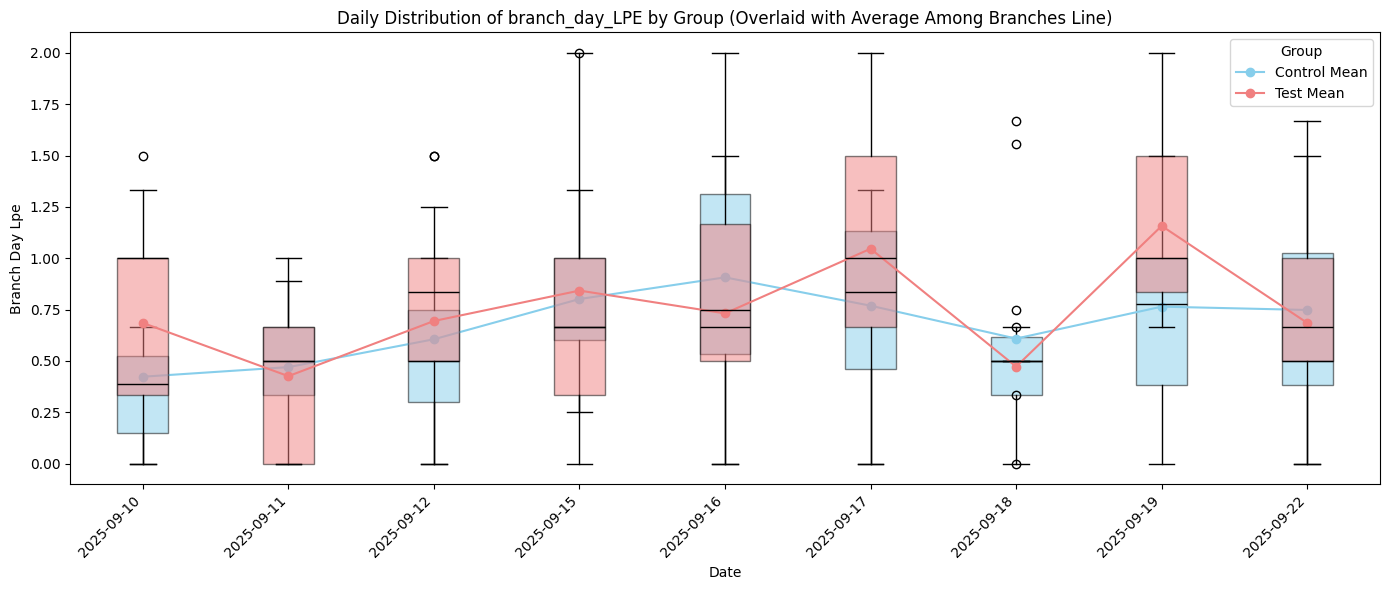

In [45]:
import matplotlib.pyplot as plt

# Ensure CalendarDate is datetime
df["CalendarDate"] = pd.to_datetime(df["CalendarDate"])

metric = "branch_day_LPE"

plt.figure(figsize=(14,6))

dates = sorted(df["CalendarDate"].unique())
groups = df["Group"].unique()

# Assign colors for groups
colors = {grp: col for grp, col in zip(groups, ["skyblue", "lightcoral", "lightgreen", "orange"])}

for grp in groups:
    # Collect data for this group, aligned by each date
    data_for_group = [
        df.loc[
            (df["CalendarDate"] == d) & (df["Group"] == grp), metric
        ].dropna().values
        for d in dates
    ]

    # Overlay boxes (same positions for all groups)
    plt.boxplot(
        data_for_group,
        positions=range(len(dates)),
        widths=0.35,
        patch_artist=True,
        boxprops=dict(facecolor=colors[grp], alpha=0.5),
        medianprops=dict(color="black"),
    )

    # Overlay mean line
    mean_values = [vals.mean() if len(vals) > 0 else None for vals in data_for_group]
    plt.plot(range(len(dates)), mean_values, color=colors[grp], marker="o", label=f"{grp} Mean")

# Format x-axis with date labels
plt.xticks(range(len(dates)), [d.strftime("%Y-%m-%d") for d in dates], rotation=45, ha="right")

plt.title(f"Daily Distribution of {metric} by Group (Overlaid with Average Among Branches Line)")
plt.xlabel("Date")
plt.ylabel(metric.replace("_", " ").title())
plt.legend(title="Group")
plt.tight_layout()
plt.show()


In [46]:
# !pip install statsmodels

In [47]:
import pandas as pd
import statsmodels.formula.api as smf


# --- 2. Difference-in-Differences regression ---
# Model: LPE ~ Group + Post + Group*Post
# Cluster standard errors by district
did_model = smf.ols("LPE ~ Group_num + Post + Group_num:Post", data=df).fit(
    cov_type="cluster",
    cov_kwds={"groups": df["branch_district"]}  # cluster at district level
)

print("\n=== Branch×Day Difference-in-Differences ===")
print(did_model.summary())

# --- 3. Extract key effect ---
salesforce_effect = did_model.params["Group_num:Post"]
salesforce_p = did_model.pvalues["Group_num:Post"]

print("\nEstimated Salesforce Effect (Group_num×Post):", round(salesforce_effect, 4))
print("p-value:", round(salesforce_p, 4))

# Dynamic takeaway message
direction = "increased" if salesforce_effect > 0 else "decreased"
signif = "statistically significant" if salesforce_p < 0.05 else "not statistically significant"

print("------Takeaways:")
print(
    f"After controlling for baseline differences and overall post-go-live trends, "
    f"Salesforce rollout {direction} loans per employee (LPE) by ~{salesforce_effect:.3f} "
    f"per branch-day in the Test group relative to Control."
)
print(
    f"Salesforce branches are averaging ~{salesforce_effect:.3f} more loans per employee "
    f"per day after rollout compared to control branches. "
    f"The effect is {signif} (p = {salesforce_p:.4f}). "
    f"{'But since only 1 Test vs. 1 Control district is in play, add more clusters for rock-solid inference.'}"
)


# print("\nEstimated Salesforce Effect (Group_num×Post):", round(salesforce_effect, 4))
# print("p-value:", round(salesforce_p, 4))
# print("------Takeaways: After controlling for baseline differences and overall post-go-live trends, Salesforce rollout increased loans per employee (LPE) by ~0.046 per branch-day in the Test group relative to Control.Salesforce branches are averaging ~0.046 more loans per employee per day after rollout compared to control branches. The effect is large enough that we can be confident it’s not just noise — but since only 1 Test vs. 1 Control district is in play, add more clusters for rock-solid inference.")


=== Branch×Day Difference-in-Differences ===
                            OLS Regression Results                            
Dep. Variable:                    LPE   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.175
Date:                Wed, 24 Sep 2025   Prob (F-statistic):              0.420
Time:                        12:37:10   Log-Likelihood:                -136.20
No. Observations:                 189   AIC:                             280.4
Df Residuals:                     185   BIC:                             293.4
Df Model:                           3                                         
Covariance Type:              cluster                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

c:\Users\mouattara\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [48]:
# Build branch-level pre and post averages
pre = (df[df["Post"]==0]
       .groupby(["Branch","Group_num"], as_index=False)["LPE"].mean()
       .rename(columns={"LPE":"LPE_pre"}))

post = (df[df["Post"]==1]
        .groupby(["Branch","Group_num"], as_index=False)["LPE"].mean()
        .rename(columns={"LPE":"LPE_post"}))

branch_avg = pd.merge(pre, post, on=["Branch","Group_num"], how="inner")

# ANCOVA regression
ancova = smf.ols("LPE_post ~ Group_num + LPE_pre", data=branch_avg).fit()
print(ancova.summary())

print("\nEstimated Salesforce Effect (Group):",
      round(ancova.params["Group_num"], 4),
      "p =", round(ancova.pvalues["Group_num"], 4))
print("\nThe branch-level ANCOVA model shows Test branches averaged ", round(ancova.params["Group_num"], 4) ,",  higher LPE than Control after rollout, adjusting for pre-LPE. But with only 11 branches, this is not statistically significant. The DiD panel model is more informative here because it uses many more data points.")

                            OLS Regression Results                            
Dep. Variable:               LPE_post   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                    0.6118
Date:                Wed, 24 Sep 2025   Prob (F-statistic):              0.553
Time:                        12:37:10   Log-Likelihood:               -0.81608
No. Observations:                  21   AIC:                             7.632
Df Residuals:                      18   BIC:                             10.77
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6454      0.171      3.775      0.0

In [49]:
import pandas as pd
from pathlib import Path

def lpe_summary_table(csv_path: str, out_csv: str = "lpe_summary_pre_post.csv") -> pd.DataFrame:
    """
    Build the LPE summary table:
      Group | Pre | Post | Delta | Pct_Change
    using columns: Group, PrePost, branch_day_LPE, CalendarDate (dates ok as strings)

    Args:
        csv_path: path to the Salesforce monitoring CSV.
        out_csv:  where to save the summary table CSV.

    Returns:
        pandas.DataFrame with the summary.
    """
    df = pd.read_csv(csv_path)

    # Basic checks
    req = {"Group", "PrePost", "branch_day_LPE"}
    missing = req - set(df.columns)
    if missing:
        raise ValueError(f"Missing columns in CSV: {sorted(missing)}")

    # Compute means by Group & PrePost
    summary = (
        df.groupby(["Group", "PrePost"], as_index=False)["branch_day_LPE"]
          .mean()
          .pivot(index="Group", columns="PrePost", values="branch_day_LPE")
          .reset_index()
    )

    # Delta & % change
    summary["Delta"] = (summary["Post"] - summary["Pre"]).astype(float)
    summary["Pct_Change"] = (summary["Delta"] / summary["Pre"] * 100).astype(float)

    # Optional: consistent rounding for leadership view
    summary = summary[["Group", "Post", "Pre", "Delta", "Pct_Change"]]
    summary["Post"] = summary["Post"].round(6)       # keep precision if needed
    summary["Pre"] = summary["Pre"].round(6)
    summary["Delta"] = summary["Delta"].round(6)
    summary["Pct_Change"] = summary["Pct_Change"].round(6)

    # Save to CSV
    Path(out_csv).parent.mkdir(parents=True, exist_ok=True)
    summary.to_csv(out_csv, index=False)

    return summary

# --- Example usage ---
if __name__ == "__main__":
    table = lpe_summary_table("df_branch_day.csv", out_csv="lpe_summary_pre_post.csv")
    print(table)


PrePost    Group      Post       Pre     Delta  Pct_Change
0        Control  0.722569  0.641389  0.081181   12.656994
1           Test  0.840278  0.675926  0.164352   24.315068


In [50]:
# branch_avg.head(30)

In [51]:
# eff = float(ancova.params.get("Group_num", np.nan))
# p = float(ancova.pvalues.get("Group_num", np.nan))
# print(eff,p)

In [52]:
# df["CalendarDate"] = pd.to_datetime(df["CalendarDate"])
# print("Earliest CalendarDate:", df["CalendarDate"].min())


In [53]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Reload file after reset
# # file_path = "/mnt/data/06b77b8e-b4ae-4510-b9cd-8e3228895dc7"
# # df = pd.read_csv(file_path)

# # Ensure CalendarDate is datetime
# # df["CalendarDate"] = pd.to_datetime(df["CalendarDate"])

# # Compute branch-day LPE if not already computed
# # emp_col = "total_employee_size" if "total_employee_size" in df.columns else ("#emps" if "#emps" in df.columns else None)
# # if emp_col is None:
# #     raise ValueError("Need total_employee_size or #emps column to compute LPE.")
# # df["_emp_den"] = pd.to_numeric(df[emp_col], errors="coerce").clip(lower=1)
# # df["LPE"] = df["new_loans"] / df["_emp_den"]

# # Aggregate daily LPE trend for Test vs Control
# daily_trend = df.copy()
# # (
# #     df.groupby(["CalendarDate", "Group"])["LPE"]
# #       .mean()
# #       .reset_index()
# # )

# # Plot
# plt.figure(figsize=(12,6))
# for group, data in daily_trend.groupby("Group"):
#     plt.plot(data["CalendarDate"], data["LPE"], marker="o", label=group)

# plt.title("Daily Average Loans per Employee (LPE): Test vs Control")
# plt.xlabel("Date")
# plt.ylabel("Average LPE")
# plt.legend(title="Group")
# plt.grid(True)
# plt.tight_layout()

# plt_path = "LPE_trend_plot.pdf"
# plt.savefig(plt_path)
# plt.close()

# plt_path


In [54]:
# pip install nbconvert

In [55]:
# import os

# print("Current working directory:", os.getcwd())
# # print("Files here:", os.listdir())


In [56]:
# import notebook


In [57]:
# import shutil

# # Replace with your actual notebook filename
# original = r"C:\Users\sguo.MARINERFINANCE\Salesforce_AB_testing_cluster_random.ipynb"
# copy = r"C:\Users\sguo.MARINERFINANCE\Salesforce_AB_testing_cluster_random_backup.ipynb"
# # original = "Salesforce_AB_testing_cluster_random.ipynb"
# # copy = "Salesforce_AB_testing_cluster_random_backup.ipynb"

# shutil.copyfile(original, copy)
# print(f"Notebook copied to {copy}")


In [58]:
# # Export *this* notebook to HTML (no code cells), from inside the notebook.

# import os, sys, json
# import nbformat

# # --- Try to locate the current notebook path ---
# def _nb_path_via_ipynbname():
#     try:
#         import ipynbname  # pip install ipynbname
#     except Exception:
#         # Try to install ipynbname if missing
#         try:
#             import subprocess, sys as _sys
#             subprocess.check_call([_sys.executable, "-m", "pip", "install", "-q", "ipynbname"])
#             import ipynbname
#         except Exception:
#             return None
#     try:
#         return str(ipynbname.path())
#     except Exception:
#         return None

# def _nb_path_via_server():
#     # Fallback that queries the local Jupyter server for the session’s notebook path
#     try:
#         import ipykernel
#         from notebook import notebookapp
#         import requests
#         connection_file = ipykernel.get_connection_file()
#         kernel_id = os.path.basename(connection_file).split("-", 1)[1].split(".")[0]
#         for srv in notebookapp.list_running_servers():
#             try:
#                 # Auth token if present
#                 token = srv.get("token", "")
#                 url = srv["url"] + "api/sessions"
#                 headers = {}
#                 params = {"token": token} if token else {}
#                 r = requests.get(url, headers=headers, params=params, timeout=3)
#                 for s in r.json():
#                     if s.get("kernel", {}).get("id") == kernel_id:
#                         return os.path.join(s["notebook"]["path"]) if srv.get("notebook_dir") is None else \
#                                os.path.join(srv["notebook_dir"], s["notebook"]["path"])
#             except Exception:
#                 continue
#     except Exception:
#         pass
#     return None

# def get_current_notebook_path():
#     return _nb_path_via_ipynbname() or _nb_path_via_server()

# # --- Export function: outputs-only (no code) ---
# def export_this_notebook_to_html(outputs_html="outputs_only.html", execute=False):
#     """
#     Exports the currently running notebook to HTML with no code cells (outputs + markdown only).
#     Set execute=True to re-run the notebook before exporting.
#     """
#     nb_path = get_current_notebook_path()
#     if not nb_path or not os.path.exists(nb_path):
#         raise RuntimeError(
#             "Couldn't detect the current notebook path automatically. "
#             "Please specify a path manually or run this from a standard Jupyter environment."
#         )

#     print(f"Detected notebook: {nb_path}")

#     # Load notebook
#     nb = nbformat.read(nb_path, as_version=4)

#     # Optionally execute before exporting (fresh outputs)
#     if execute:
#         from nbconvert.preprocessors import ExecutePreprocessor
#         ep = ExecutePreprocessor(timeout=900, kernel_name="python3")
#         ep.preprocess(nb, {"metadata": {"path": os.path.dirname(nb_path) or "."}})

#     # Export to HTML, excluding code and input prompts
#     from nbconvert import HTMLExporter
#     exporter = HTMLExporter()
#     exporter.exclude_input = True
#     exporter.exclude_input_prompt = True

#     body, _ = exporter.from_notebook_node(nb)
#     with open(outputs_html, "w", encoding="utf-8") as f:
#         f.write(body)

#     print(f"Saved outputs-only HTML → {outputs_html}")

# from datetime import date

# today = date.today().strftime("%Y%m%d")  # e.g. 20250922
# # ---- Run it (set execute=True if you want to re-run the notebook first) ----
# export_this_notebook_to_html(outputs_html="Salesforce_monitoring_notebook_output"+today+".html", execute=False)


In [59]:
# %run "Salesforce AB testing - Check random - monitoring - simple-daily view.ipynb"
